<a href="https://colab.research.google.com/github/BrookMaoDev/threat-trace-ai-hackthevalley8/blob/main/malaria_cell_classification_tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Dependencies

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import tensorflow_datasets as tfds
import random


# Load Data

In [ ]:
(train_ds, valid_ds), ds_info = tfds.load(
    name="malaria",
    split=['train[:80%]', 'train[80%:]'],
    shuffle_files=True,
    as_supervised=True,
    with_info=True
)

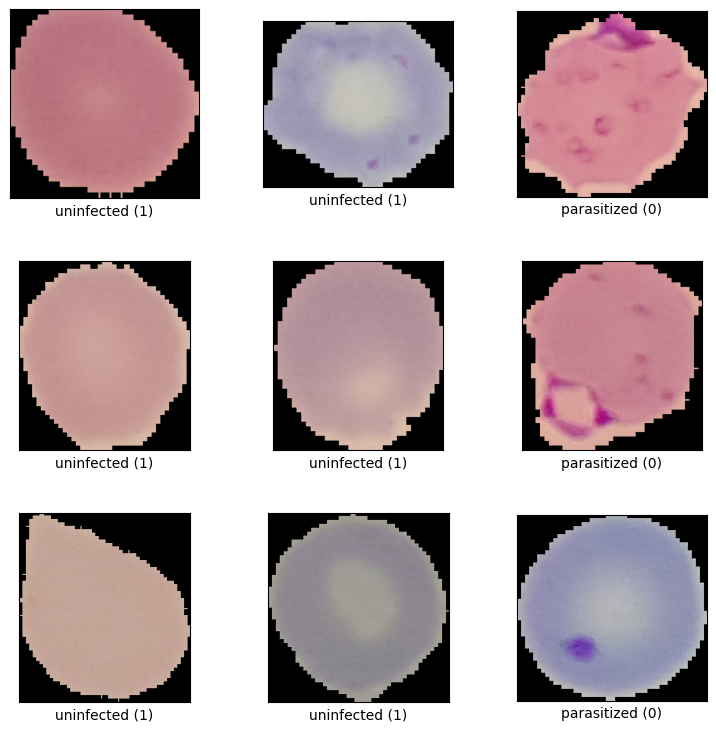

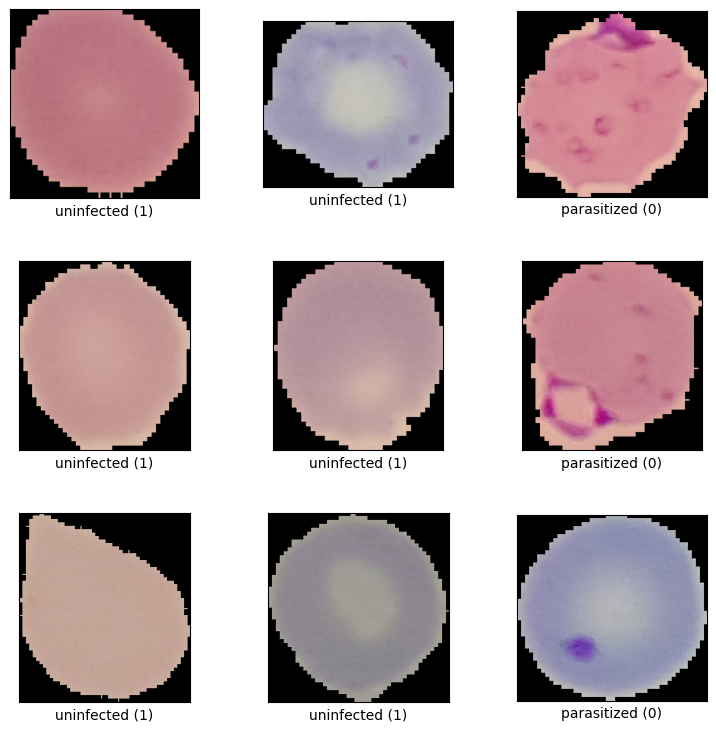

In [ ]:
tfds.show_examples(train_ds, ds_info)

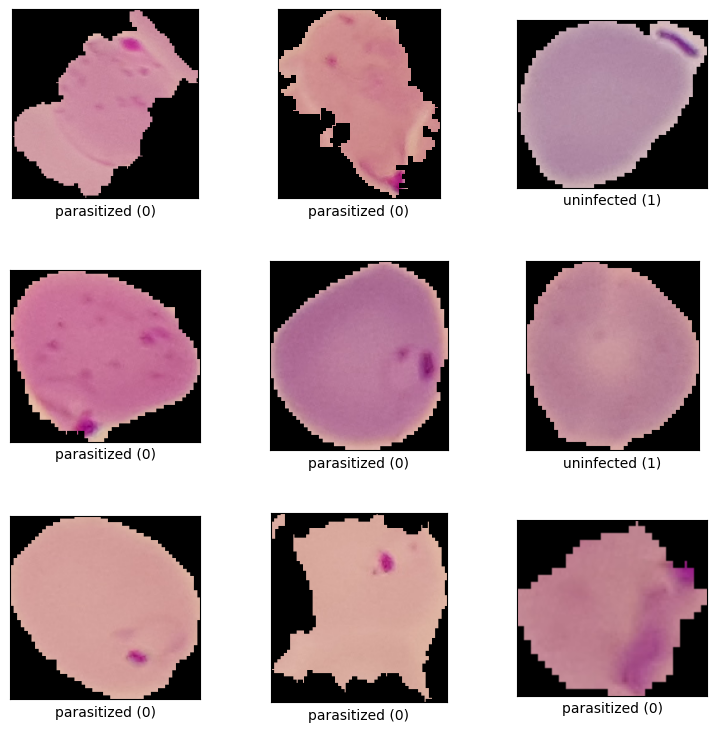

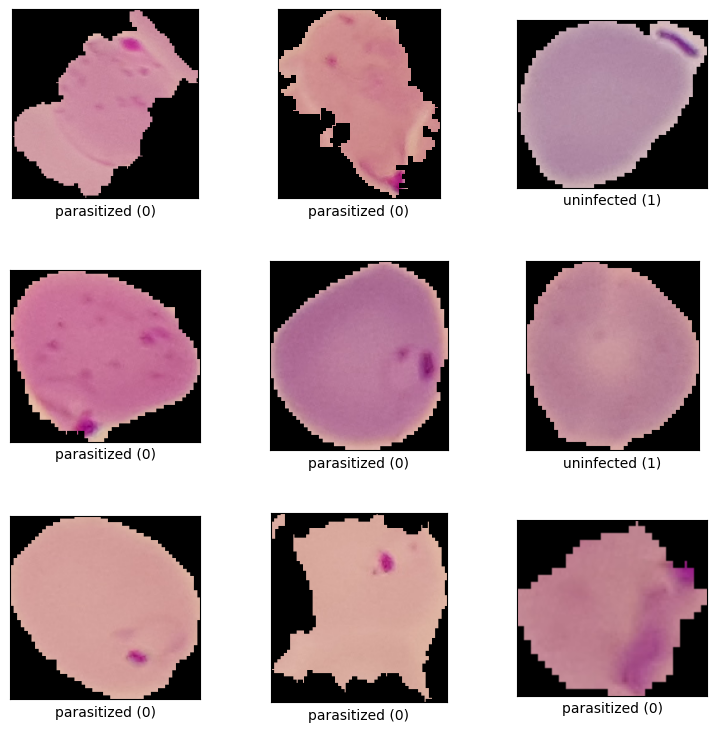

In [ ]:
tfds.show_examples(valid_ds, ds_info)

# Resize Images

In [ ]:
SIDE_LEN = 128

def resize_image(image, label):
    image = tf.image.resize(image, (SIDE_LEN, SIDE_LEN))
    image = tf.cast(image, tf.float32) / 255.0  # Normalize to [0, 1]
    return image, label

train_ds = train_ds.map(resize_image)
valid_ds = valid_ds.map(resize_image)

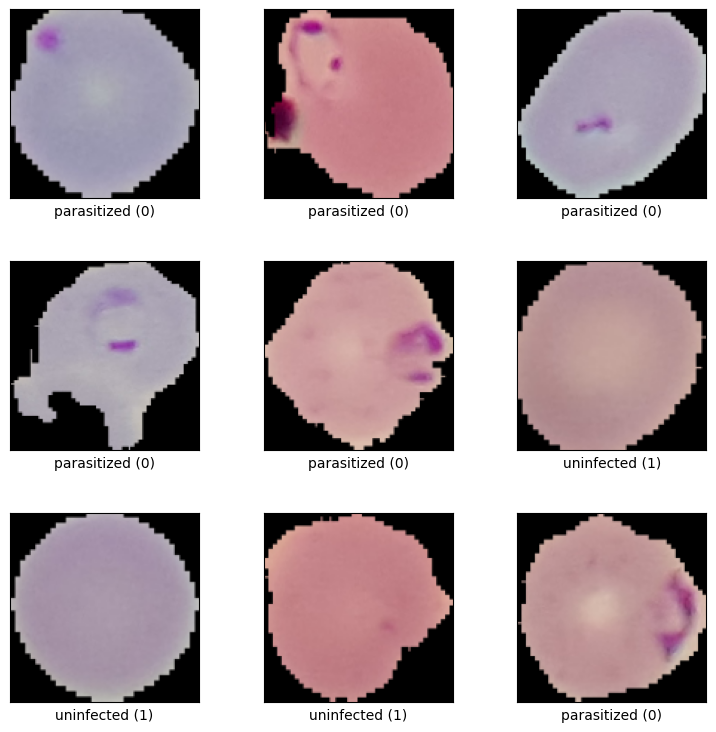

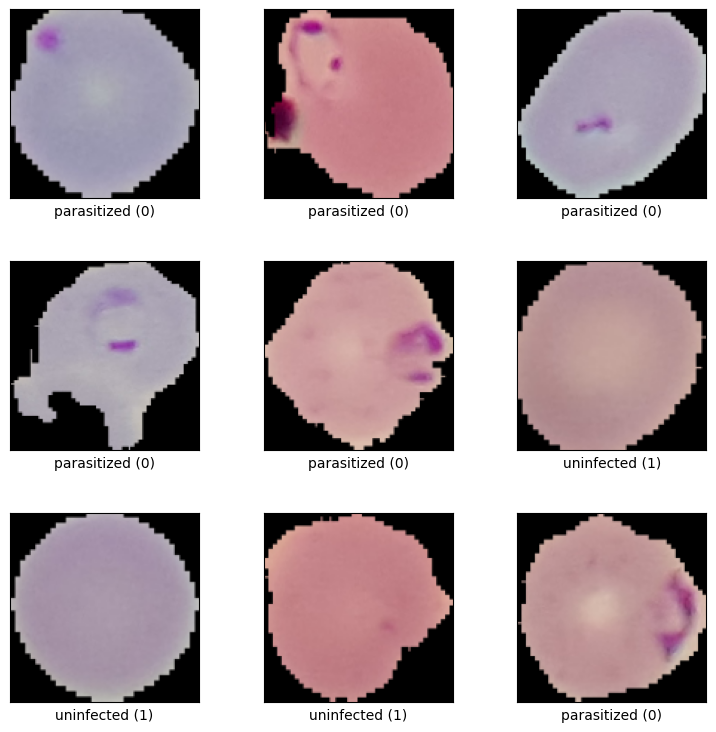

In [ ]:
tfds.show_examples(train_ds, ds_info)

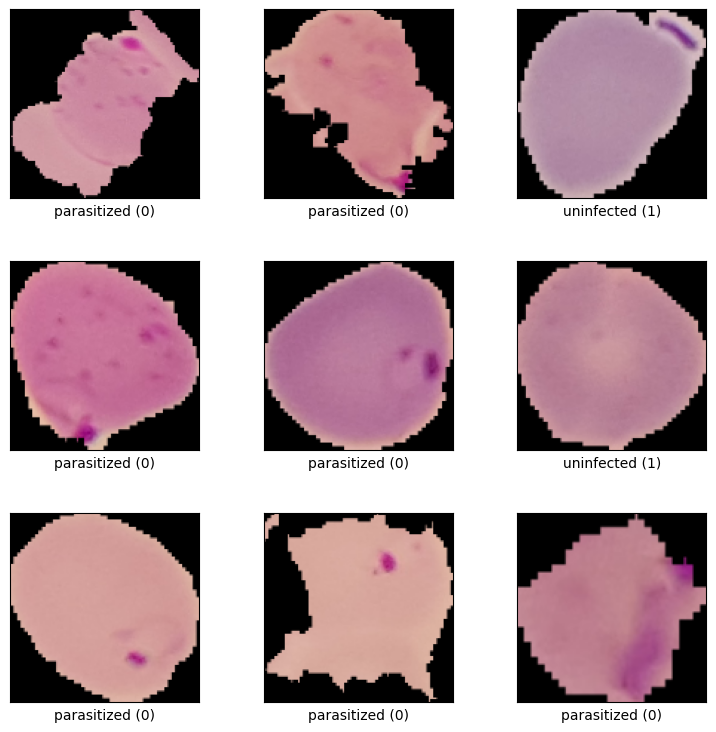

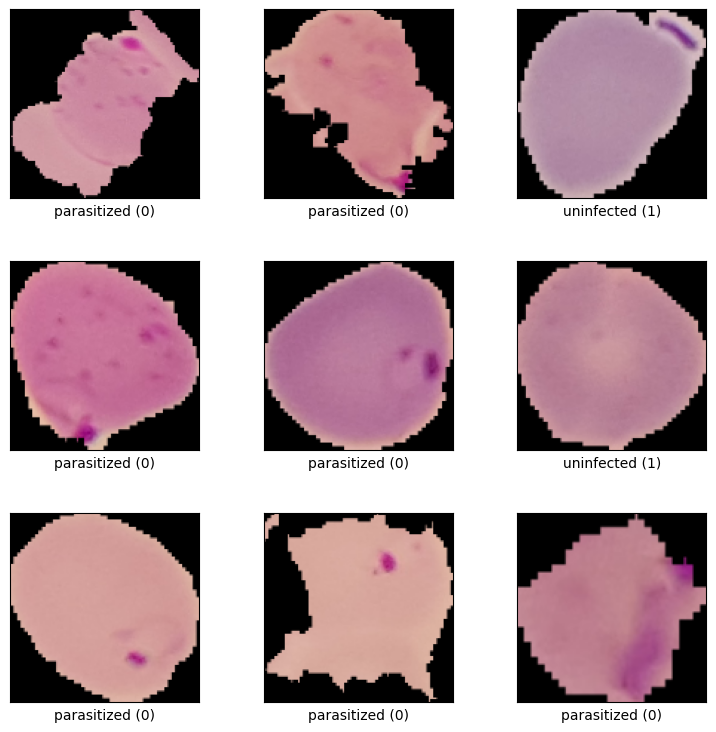

In [ ]:
tfds.show_examples(valid_ds, ds_info)

# Caching, Batching, and Prefetching

In [ ]:
BATCH_SIZE = 32

train_ds = train_ds.cache().batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)
valid_ds = valid_ds.cache().batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)

# Neural Network Training

In [ ]:
# Set seeds for reproducibility of RNG
random.seed(0)
np.random.seed(0)
tf.random.set_seed(0)

# Creates a typical neural network with layers of nodes
model = models.Sequential()

Applies convolutional filters to the input image, generating feature maps before using max pooling to reduce their dimensions.

Initially, the filters have randomized weights (although constrained by preset random seeds). Over time, the neural network adjusts these weights through training, akin to the learning process in hidden layers.

[Learn More](https://www.ibm.com/topics/convolutional-neural-networks)

In [ ]:
model.add(layers.Conv2D(128, (3, 3), activation='relu', input_shape=(SIDE_LEN, SIDE_LEN, 3)))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(32, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(1))